In [42]:
# this is the import section
import collections
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [29]:
# this is the part where we load the data
f = open('2015smalldata.txt', 'r')
sd = f.read().splitlines()

In [30]:
# it loaded, so now let's make it readable
# notice that my code is no longer trying to reinvent the wheel
day_dict = {sd[i][0:10]:collections.Counter(
        ''.join(sorted(sd[i][11:]))) for i in range(365)}

# transposes dictionary
df = pd.DataFrame(day_dict).T

# and this converts the index from datatype object to string
# not essential, but could be useful later
df.index = pd.to_datetime(df.index)
#df = df.fillna(0, inplace=True)

In [31]:
# aww yea
df.head()

,A,B,C,D,E,F,M,S,X,Y,Z
2015-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,2
2015-01-04,NaN,NaN,1,NaN,1,NaN,NaN,1,1,1,NaN
2015-01-05,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2


In [32]:
df.describe()

,A,B,C,D,E,F,M,S,X,Y,Z
count,76.000000,36.000000,59,5,143.000000,19.000000,1,57,71.000000,186.000000,209.000000
mean,1.026316,1.055556,1,1,1.125874,1.210526,1,1,1.591549,1.118280,1.430622
std,0.161136,0.232311,0,0,0.659354,0.418854,NaN,0,1.430060,0.398632,0.496352
min,1.000000,1.000000,1,1,1.000000,1.000000,1,1,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1,1,1.000000,1.000000,1,1,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1,1,1.000000,1.000000,1,1,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1,1,1.000000,1.000000,1,1,2.000000,1.000000,2.000000
max,2.000000,2.000000,1,1,8.000000,2.000000,1,1,8.000000,4.000000,2.000000


I attempted some of the activities paltry few times this year. Programming was the standout, I think partially because I did 8hr blocks of it on most days. Other than that, music was a big deal. Writing dropped significantly below where it was last year. And I went screenless at least one day a week, which is awesome.

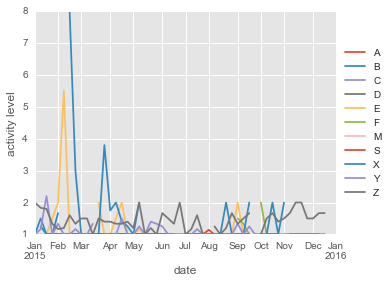

In [33]:
weeks = df.resample('W', kind='period')

weeks.plot()
plt.xlabel('date')
plt.ylabel('activity level')

ax = plt.subplot(111)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

...and this is a terrible graph because even with resampling by period there's so much going on. Too many repeating colors!! But I do know some things about this data from my experience. Namely that I didn't do a lot of drawing, memorizing, meditating, and that the screenless days tended to happen on a regular cycle. Skills, being something that I didn't quantify very well, can also be disregarded.

In [35]:
# so here's where the fun starts
# adding across rows
df['activity'] = df.sum(axis=1)

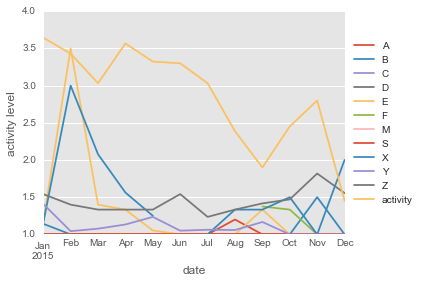

In [36]:
months = df.resample('m', kind='period')

months.plot()
plt.xlabel('date')
plt.ylabel('activity level')

ax = plt.subplot(111)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

Interpreting the graph, it looks like my activity level quickly declined throughout the year. Thinking about trends, it's mostly because I moved in August/September and took a trip in November/December.

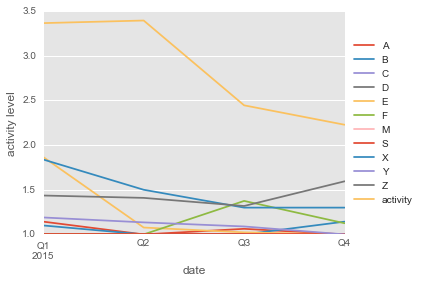

In [38]:
quarterly = df.resample('q', kind='period')

quarterly.plot()
plt.xlabel('date')
plt.ylabel('activity level')

ax = plt.subplot(111)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

Quarters 1 and 2 are okay for me, and then everything gets pretty bad into quarter 3 and 4. That means I'm going to have to stick to some better quality/efficiency control in the latter part of the year this year!